#Gaussian bayes classifier

In this assignment we will use a Gaussian bayes classfier to classify our data points.

# Import packages

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.metrics import classification_report,accuracy_score
from matplotlib import cm

# Load training data

Our data has 2D feature $x1, x2$. Data from the two classes is are in $\texttt{class1_train}$ and $\texttt{class2_train}$ respectively. Each file has two columns corresponding to the 2D feature.

In [0]:
class1_train = pd.read_csv('https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L3/class1_train').to_numpy()
class2_train = pd.read_csv('https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L3/class2_train').to_numpy()
print(class1_train)

[[ 3.20478053e-01  4.81092097e-01]
 [ 5.06909985e-02  9.63995041e-02]
 [ 3.74846984e+00  4.03931041e-01]
 [ 2.25637447e+00  2.08996208e+00]
 [ 1.42145382e+00  1.24362901e+00]
 [ 4.08062705e-01  9.24810050e-01]
 [ 1.60681941e+00  4.75268430e-01]
 [ 1.57397678e+00  1.60394699e+00]
 [ 1.73121450e+00  2.43452464e+00]
 [ 9.30696141e-01  2.12345759e-01]
 [ 1.43750641e+00 -2.84913595e-01]
 [-4.91480512e-01  2.70506180e-01]
 [ 2.35052206e+00  2.34923853e+00]
 [ 1.06032568e+00  2.25909849e-01]
 [ 2.23321779e+00  1.18800751e+00]
 [-3.36602971e-01  8.26100949e-01]
 [ 1.21051794e+00  3.59324046e-01]
 [ 1.95878231e+00  2.81435856e+00]
 [ 5.35856323e-01 -1.54336636e-01]
 [ 2.89423945e+00  1.71311383e+00]
 [ 1.38569352e+00  1.74692600e+00]
 [ 1.27854113e+00 -3.70841388e-01]
 [-9.07354159e-02  2.42044784e+00]
 [ 9.07143282e-01  5.69730755e-01]
 [ 2.28848082e+00  1.68559588e+00]
 [-1.53479431e-01 -3.95808482e-01]
 [ 2.40208659e+00  4.41623125e-01]
 [ 1.21455553e+00  1.51675544e+00]
 [ 3.15059021e+00  2

# Visualize training data
Generate 2D scatter plot of the training data. Plot the points from class 1 in red and the points from class 2 in blue.

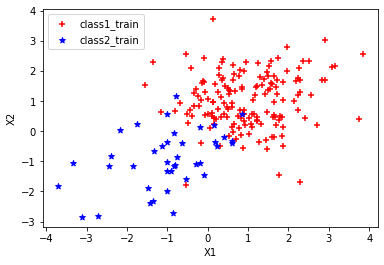

In [0]:
plt.scatter(x=class1_train[:,0],y=class1_train[:,1],color='red',label='class1_train',marker='+')
plt.scatter(x=class2_train[:,0],y=class2_train[:,1],color='blue',label='class2_train',marker='*')
plt.legend()
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# Maximum likelihood estimate of parameters

We will model the likelihood, $P(\mathbf{x}|C_1)$ and $P(\mathbf{x}|C_2)$ as $\mathcal{N}(\mathbf{\mu_1},|\Sigma_1)$ and $\mathcal{N}(\mathbf{\mu_2},|\Sigma_2)$ respectively. The prior probability of the classes are called, $P(C_1)=\pi_1$ and $P(C_2)=\pi_2$.

The maximum likelihood estimate of the parameters as follows:
\begin{align*}
\pi_k &= \frac{\sum_{i=1}^N \mathbb{1}(t^i=k)}{N}\\
\mathbf{\mu_k} &= \frac{\sum_{i=1}^N \mathbb{1}(t^i=k)\mathbf{x}^i}{\sum_{i=1}^N \mathbb{1}(t^i=k)}\\
\Sigma_k &= \frac{\sum_{i=1}^N \mathbb{1}(t^i=k)(\mathbf{x}^i-\mathbf{\mu_k})(\mathbf{x}^i-\mathbf{\mu_k})^T}{\sum_{i=1}^N \mathbb{1}(t^i=k)}\\
\end{align*}

Here, $t^i$ is the target or class of $i^{th}$ sample. $\mathbb{1}(t^i=k)$ is 1 if $t^i=k$ and 0 otherwise.

Compute maximum likelihood values estimates of $\pi_1$, $\mu_1$, $\Sigma_1$ and $\pi_2$, $\mu_2$, $\Sigma_2$ 

Also print these values


In [0]:
num_rows1, num_cols1=class1_train.shape
num_rows2, num_cols2=class2_train.shape
prior1=(num_rows1)/(num_rows1+num_rows2)
prior2=(num_rows2)/(num_rows1+num_rows2)
mean1=class1_train.mean(axis=0)
mean2=class2_train.mean(axis=0)
sig1=np.cov(class1_train,rowvar=False)
sig2=np.cov(class2_train,rowvar=False)

# Visualize the likelihood
Now that you have the parameters, let us visualize how the likelihood looks like.

1. Use $\texttt{np.mgrid}$ to generate points uniformly spaced in -5 to 5 along 2 axes
1. Use $\texttt{multivariate_normal.pdf}$ to get compute the Gaussian likelihood for each class  
1. Use $\texttt{plot_surface}$ to plot the likelihood of each class.
1. Use $\texttt{contourf}$ to plot the likelihood of each class. 

You may find the code in the lecture notebook helpful.
 
For the plots, use $\texttt{cmap=cm.Reds}$ for class 1 and $\texttt{cmap=cm.Blues}$ for class 2. Use $\texttt{alpha=0.5}$ to overlay both plots together.

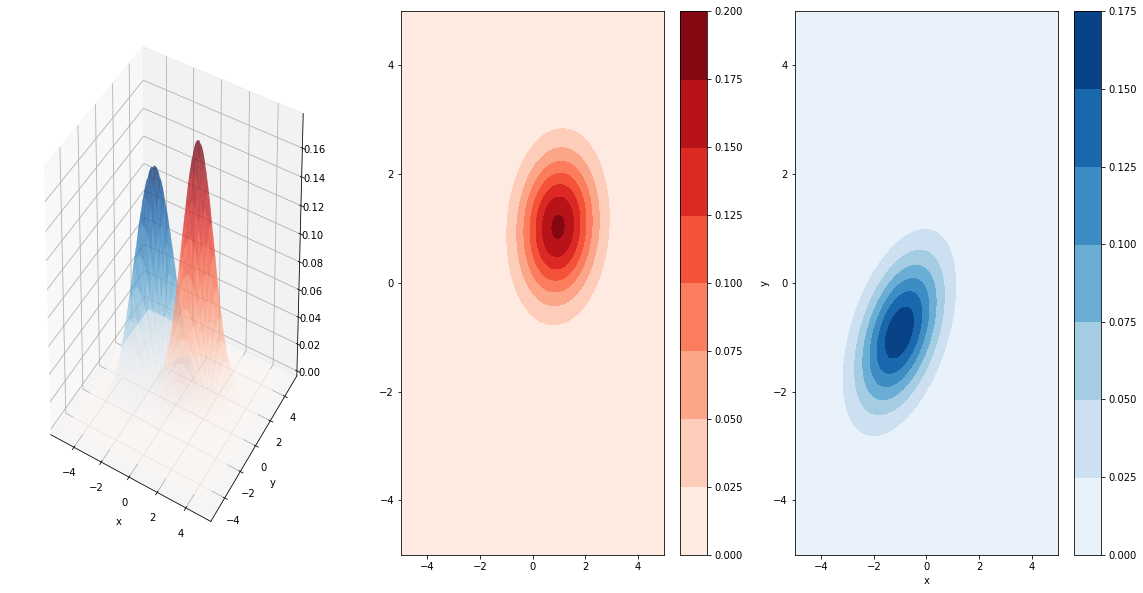

In [0]:
from matplotlib import cm
x, y = np.mgrid[-5:5:.01, -5:5:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
rv1 = multivariate_normal(mean =mean1, cov =sig1)
rv2 = multivariate_normal(mean =mean2, cov =sig2)
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(131, projection='3d')
plt.xlabel('x')
plt.ylabel('y')
ax.plot_surface(x,y,rv1.pdf(pos), cmap=cm.Reds,alpha=.5)
ax.plot_surface(x,y,rv2.pdf(pos), cmap=cm.Blues,alpha=.5)
plt.subplot(132)
plt.contourf(x, y, rv1.pdf(pos), cmap=cm.Reds)
plt.colorbar()
plt.subplot(133)
plt.contourf(x, y, rv2.pdf(pos), cmap=cm.Blues)
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#Visualize the posterior
Use the prior and the likelihood you've computed to obtain the posterior distribution for each class.

Like in the case of the likelihood above, make same similar surface and contour plots for the posterior.

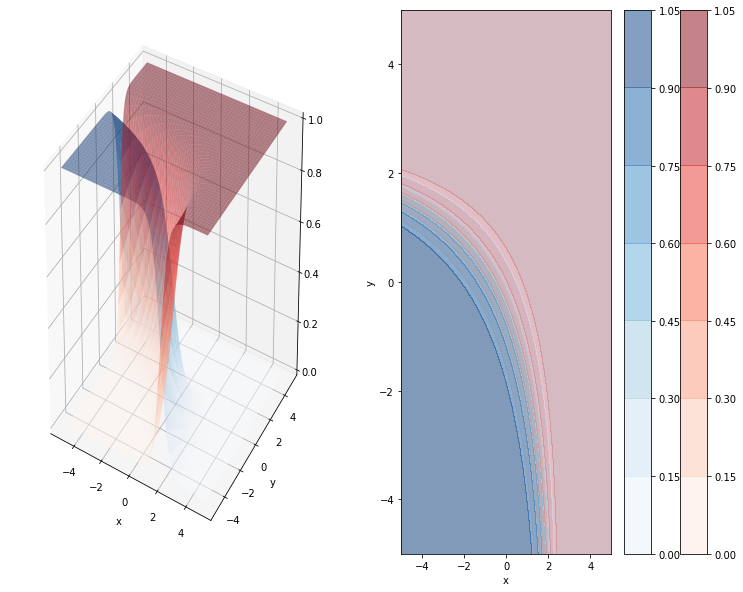

In [0]:
likelihood1=rv1.pdf(pos)
likelihood2=rv2.pdf(pos)
posterior1 = likelihood1* prior1 /(likelihood1*prior1+likelihood2*prior2)
posterior2 = likelihood2* prior2 /(likelihood1*prior1+likelihood2*prior2)
from matplotlib import cm
x, y = np.mgrid[-5:5:.01, -5:5:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(131, projection='3d')
plt.xlabel('x')
plt.ylabel('y')
ax.plot_surface(x,y,posterior1, cmap=cm.Reds,alpha=.5)
ax.plot_surface(x,y,posterior2, cmap=cm.Blues,alpha=.5)
plt.subplot(132)
plt.contourf(x, y,posterior1, cmap=cm.Reds,alpha=.5)
plt.colorbar()
plt.contourf(x, y, posterior2, cmap=cm.Blues,alpha=.5)
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Decision boundary
1. Decision boundary can be obtained by $P(C_2|x)>P(C_1|x)$ in python. Use $\texttt{contourf}$ to plot the decision boundary. Use $\texttt{cmap=cm.Blues}$ and $\texttt{alpha=0.5}$
1. Also overlay the scatter plot of train data points from the 2 classes on the same plot. Use red color for class 1 and blue color for class 2 

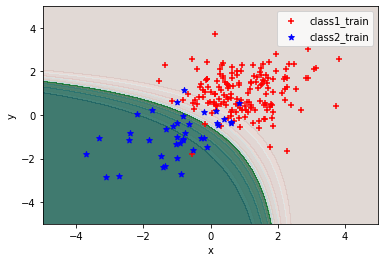

In [0]:
des=posterior2>posterior1
plt.contourf(x, y,posterior1, cmap=cm.Reds,alpha=.5)
plt.contourf(x, y, posterior2, cmap=cm.Blues,alpha=.5)
plt.contourf(x, y,des, cmap=cm.Greens,alpha=.5)
plt.scatter(x=class1_train[:,0],y=class1_train[:,1],color='red',label='class1_train',marker='+')
plt.scatter(x=class2_train[:,0],y=class2_train[:,1],color='blue',label='class2_train',marker='*')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Test Data
Now let's use our trained model to classify test data points

1. $\texttt{test_data}$ contains the $x1,x2$ features of different data points
1. $\texttt{test_label}$ contains the true class of the data points. 0 means class 1. 1 means class 2.  
1. Classify the test points based on whichever class has higher posterior probability for each data point
1. Use $\texttt{classification_report}$ to test the classification performance

In [0]:
test = pd.read_csv('https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L3/test').to_numpy()
test_data, test_label = test[:,:2], test[:,2]

In [0]:
likelihood1=rv1.pdf(test_data)
likelihood2=rv2.pdf(test_data)
p1_test= likelihood1* prior1 /(likelihood1*prior1+likelihood2*prior2)
p2_test= likelihood2* prior2 /(likelihood1*prior1+likelihood2*prior2)
classify_test_label=p2_test>p1_test
classify_test_label=np.where(classify_test_label,1,0)
classify_test_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1])

In [0]:
test_label

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [0]:
print(accuracy_score(test_label,classify_test_label))

0.8775510204081632


In [0]:
print(classification_report(test_label,classify_test_label))

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93        40
         1.0       0.67      0.67      0.67         9

    accuracy                           0.88        49
   macro avg       0.80      0.80      0.80        49
weighted avg       0.88      0.88      0.88        49

